## Experiments: Comparing RSAST with other methods

In [1]:
#configure directory to import sast libraries
import sys 
import os 
#add sast library path
file_path = os.path.expanduser("~/random_sast/sast")
sys.path.append(file_path)
#add cd_diagram library path
file_path = os.path.expanduser("~/random_sast/cd_diagram")
sys.path.append(file_path)

#sys.path

In [2]:
from sast import *
from sktime.datasets import load_UCR_UEA_dataset, tsc_dataset_names
from sktime.classification.kernel_based import RocketClassifier
import time
import pandas as pd
from sktime.transformations.panel.shapelet_transform import ShapeletTransform
import matplotlib.pyplot as plt
import os

hyperparameter='ACF&PACF: n_random_points= (lenthg ts)//2 nb_inst_per_class=50'

/home/nirojasvar/anaconda3/envs/rsast_env/lib/python3.10/site-packages/mass_ts/_mass_ts.py:17: UserWarning: GPU support will not work. You must pip install mass-ts[gpu].
  warnings.warn(


### Reading Datasets

In [3]:
# Set directory where the csv files are located
directory = os.getcwd()+'/ResultsByClassifier'

# Create an empty list to store the dataframes
dfs = []

# Loop through all files in the directory
for filename in os.listdir(directory):
    # Check if the file starts with "df_overall_tunning" and ends with ".csv"
    if filename.endswith(".csv"):
        # Read the csv file into a dataframe
        filepath = os.path.join(directory, filename)
        df = pd.read_csv(filepath)

        # Append the dataframe to the list
        df['filename']=filename
        dfs.append(df)

# Concatenate all the dataframes in the list into one dataframe
df_other_methods = pd.concat(dfs, ignore_index=True)
df_other_methods=df_other_methods[['filename','folds:','0']]
df_other_methods['method']=df_other_methods['filename'].str.split('_').str[0]
df_other_methods
df_other_methods=df_other_methods.rename(columns={'folds:':'dataset','0':'score'})
df_other_methods=df_other_methods[['dataset','score','method']]



In [4]:
df_other_methods['method'].unique()

array(['SAST', 'ROCKET', 'HIVE-COTEv1', 'BOSS', 'RISE', 'TSF',
       'InceptionTime', 'TS-CHIEF', 'S-BOSS', 'STC', 'ResNet',
       'ProximityForest', 'WEASEL', 'Catch22', 'cBOSS'], dtype=object)

In [5]:
# Set directory where the csv files are located
directory = os.getcwd()+'/ResultsRsast'
#directory = os.getcwd()+'/results_accuracy_per_ds'

# Create an empty list to store the dataframes
dfs = []

# Loop through all files in the directory
for filename in os.listdir(directory):
    # Check if the file starts with "df_overall_tunning" and ends with ".csv"
    if filename.startswith("df_overall_tunning") and filename.endswith(".csv"):
        # Read the csv file into a dataframe
        filepath = os.path.join(directory, filename)
        df = pd.read_csv(filepath)
        df['rpoint']=df['rpoint'].astype(str)
        df['nb_per_class']=df['nb_per_class'].astype(str)
        
        # Append the dataframe to the list
        dfs.append(df)

# Concatenate all the dataframes in the list into one dataframe
df_result = pd.concat(dfs, ignore_index=True)
df_result.columns

Index(['Unnamed: 0', 'accuracy', 'time', 'cweights_time', 'fsubsequence_time',
       'tdataset_time', 'tclassifier_time', 'dataset_name', 'classifier_name',
       'rpoint', 'nb_per_class', 'method', 'len_method'],
      dtype='object')

In [6]:
df_result=df_result[['accuracy','dataset_name','classifier_name','time']]

df_result=df_result[df_result["classifier_name"]==hyperparameter]
df_result.dataset_name.unique()


array(['SonyAIBORobotSurface2', 'Chinatown', 'Coffee', 'GunPoint',
       'ItalyPowerDemand', 'SmoothSubspace'], dtype=object)

In [7]:

df_other_methods=df_other_methods.rename(columns={"dataset":"dataset_name","score":"accuracy","method":"classifier_name"})
df_other_methods = df_other_methods[df_other_methods['dataset_name'].isin(df_result.dataset_name.values)]
df_other_methods.columns

Index(['dataset_name', 'accuracy', 'classifier_name'], dtype='object')

In [8]:
# concatenate the two dataframes
concatenated_df = pd.concat([df_other_methods, df_result])

# reset the index of the concatenated dataframe
concatenated_df = concatenated_df.reset_index(drop=True)


In [9]:
concatenated_df['classifier_name'].unique()

array(['SAST', 'ROCKET', 'HIVE-COTEv1', 'BOSS', 'RISE', 'TSF',
       'InceptionTime', 'TS-CHIEF', 'S-BOSS', 'STC', 'ResNet',
       'ProximityForest', 'WEASEL', 'Catch22', 'cBOSS',
       'ACF&PACF: n_random_points= (lenthg ts)//2 nb_inst_per_class=50'],
      dtype=object)

### Overall analysis

#### Accuracy: RSAST vs Other methods

In [10]:
# create a pivot table with the mean of score by hyperparameter
score_by_method=pd.pivot_table(concatenated_df, values='accuracy', index=['classifier_name'],columns=['dataset_name'], aggfunc='mean')



In [11]:
t_score_by_method=score_by_method.transpose()
t_score_by_method
t_score_by_method[[hyperparameter,"STC","ROCKET"]]


classifier_name,ACF&PACF: n_random_points= (lenthg ts)//2 nb_inst_per_class=50,STC,ROCKET
dataset_name,,,
Chinatown,0.981535,0.967930,0.982507
Coffee,1.000000,1.000000,1.000000
GunPoint,0.986667,0.993333,1.000000
ItalyPowerDemand,0.950113,0.955296,0.968902
SmoothSubspace,0.944444,0.933333,0.980000
SonyAIBORobotSurface2,0.911857,0.943337,0.916055


/tmp/ipykernel_3232/3124073668.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')
/tmp/ipykernel_3232/3124073668.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')
/tmp/ipykernel_3232/3124073668.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.s

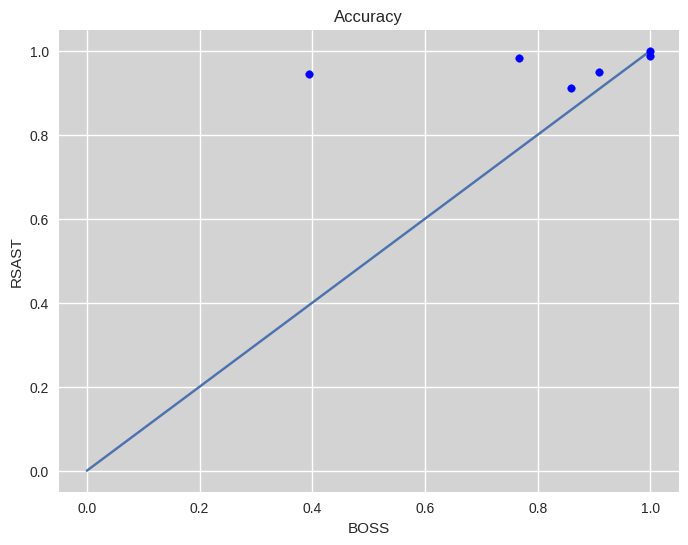

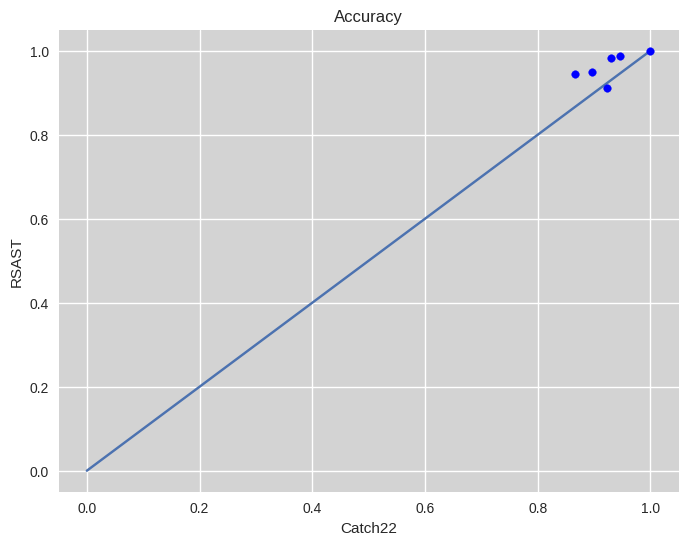

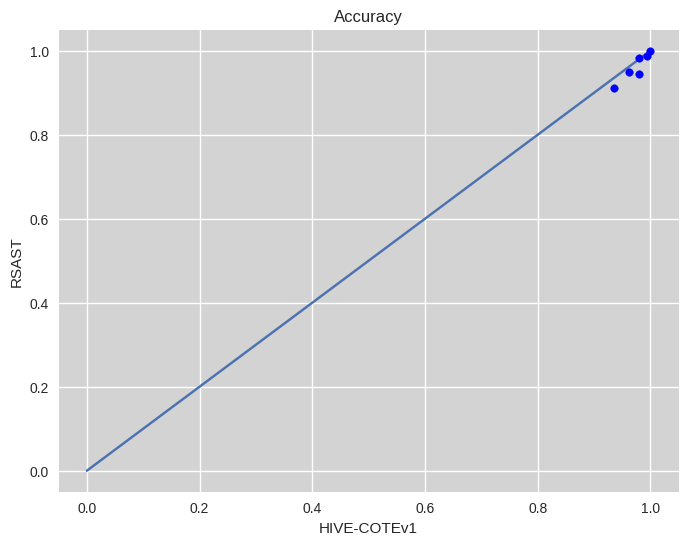

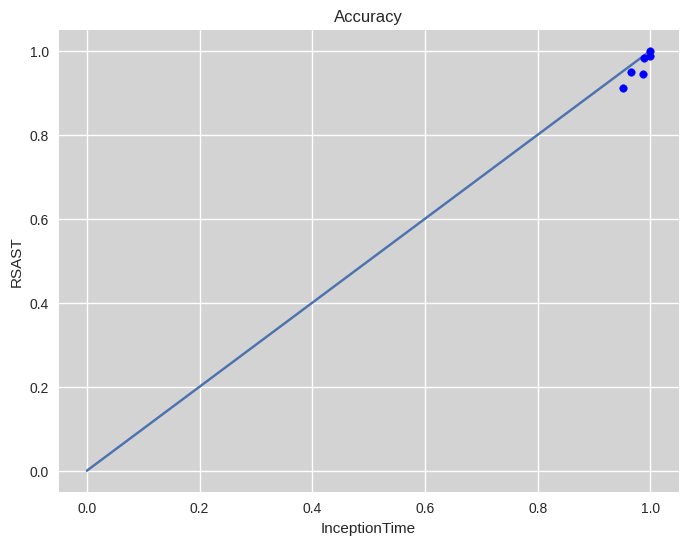

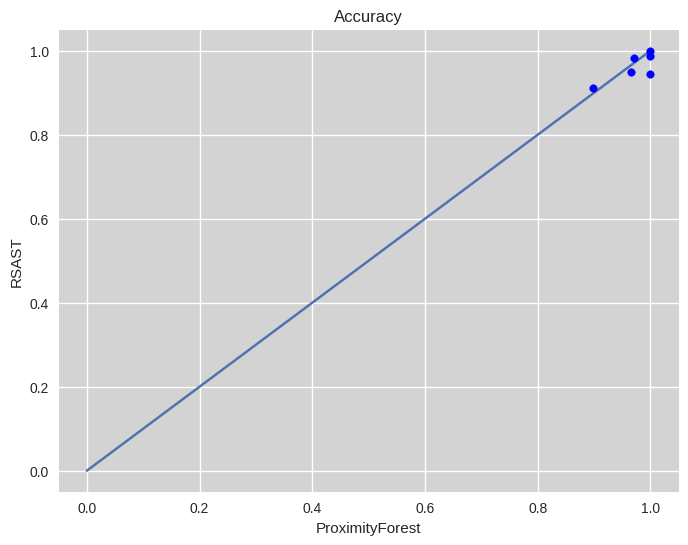

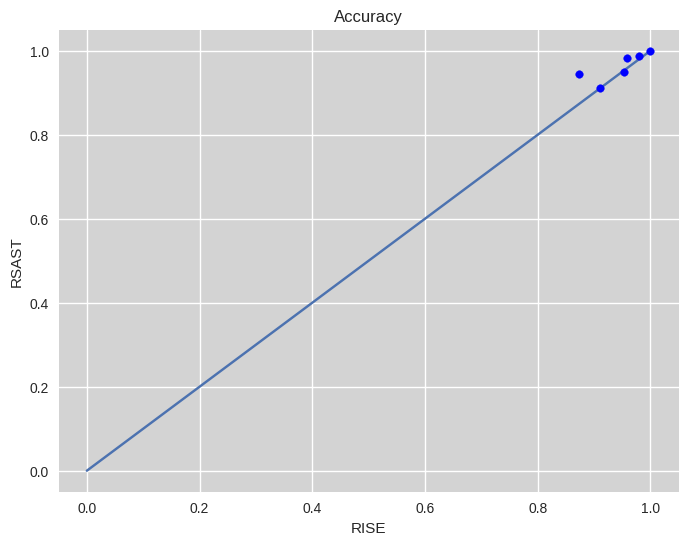

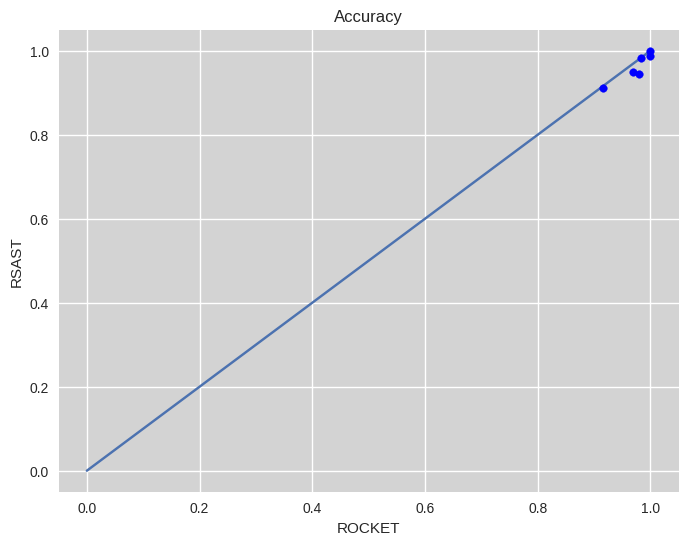

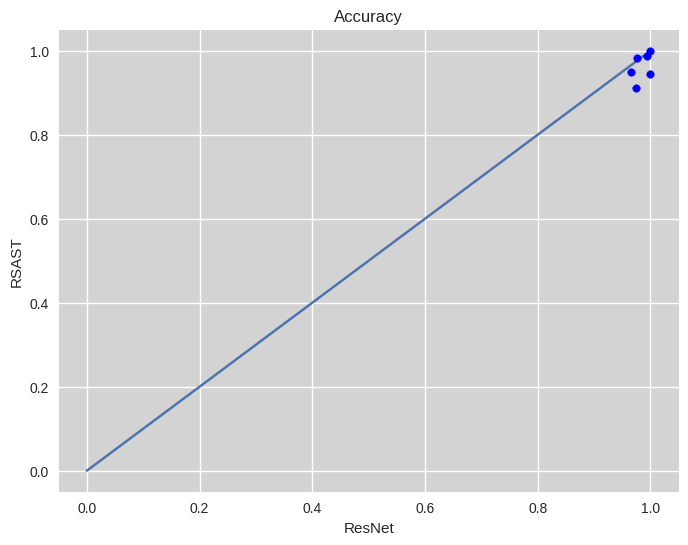

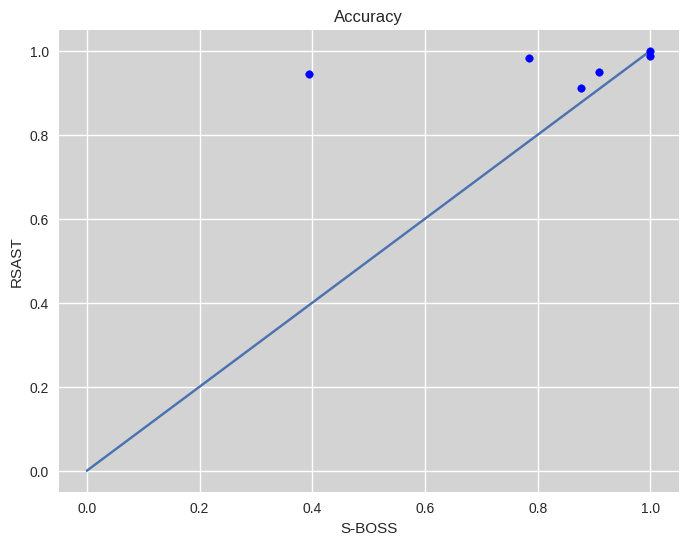

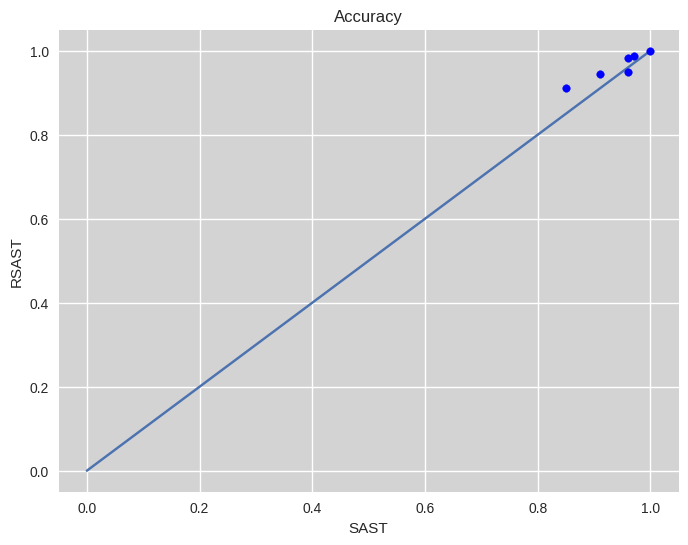

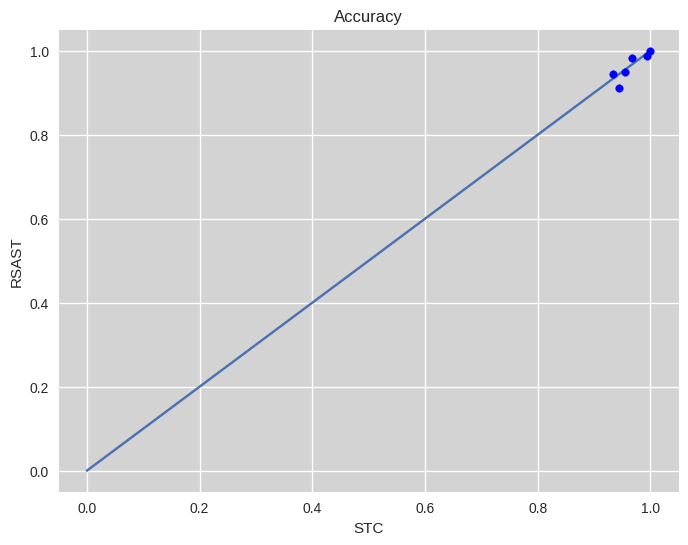

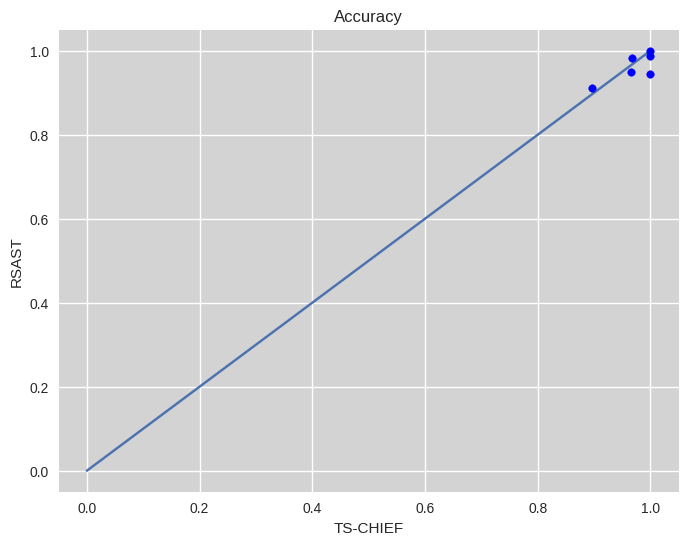

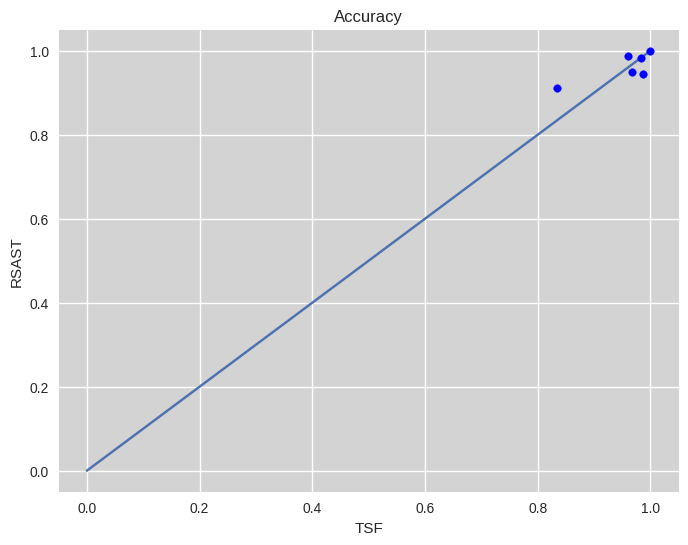

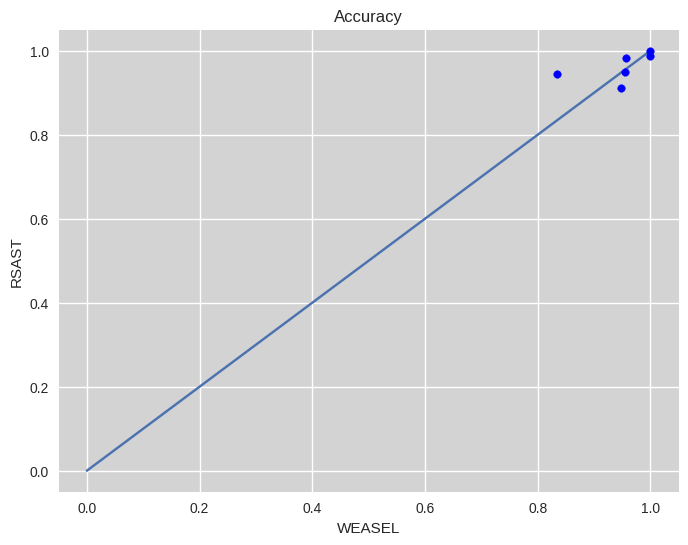

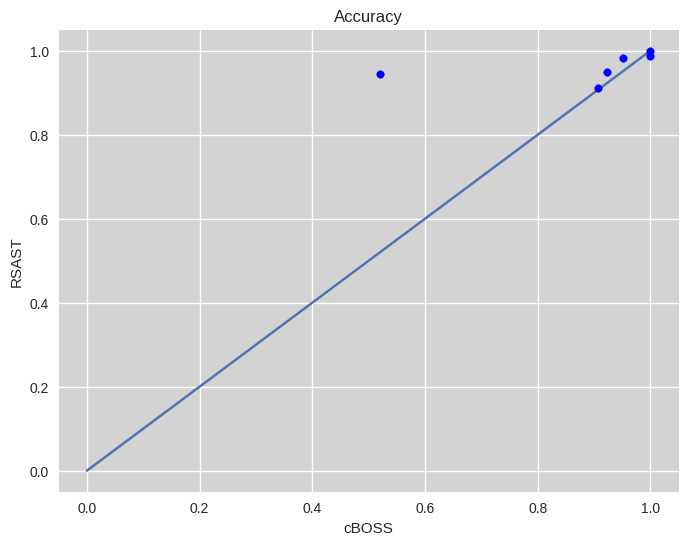

In [12]:
for method in t_score_by_method.columns.drop(hyperparameter):
    y=t_score_by_method[hyperparameter]
    x=t_score_by_method[method]

    # set the style of the plot
    plt.style.use('seaborn')

    # create the plot
    fig, ax = plt.subplots(figsize=(8, 6))

    # plot the line
    ax.plot([0,1], [0,1])

    # plot the points
    ax.scatter(x, y, color='blue', edgecolor='blue', s=30, zorder=10)

    # add labels and title
    ax.set_ylabel('RSAST')
    ax.set_xlabel(method)
    ax.set_title('Accuracy')


    # set the background color
    ax.set_facecolor('lightgrey')
    plt.savefig('images_one_vs_one_comparison/RSASTvs'+method+'.png')


In [13]:
# create a pivot table with the mean of time by hyperparameter
time_per_method=pd.pivot_table(df_result, values='time', columns=['classifier_name'],index=['dataset_name'], aggfunc='mean')/60
time_per_method

classifier_name,ACF&PACF: n_random_points= (lenthg ts)//2 nb_inst_per_class=50
dataset_name,
Chinatown,0.001975
Coffee,6.974234
GunPoint,2.788384
ItalyPowerDemand,0.012193
SmoothSubspace,0.016842
SonyAIBORobotSurface2,0.047498


In [14]:
# create a pivot table with the variation of score by hyperparameter
pd.pivot_table(concatenated_df, values='accuracy', index=['classifier_name'],columns=['dataset_name'], aggfunc='var')


dataset_name,Chinatown,GunPoint,ItalyPowerDemand,SmoothSubspace,SonyAIBORobotSurface2
classifier_name,,,,,
ACF&PACF: n_random_points= (lenthg ts)//2 nb_inst_per_class=50,0.00002,0.0,0.000025,0.000015,0.000003


#### Generate CD Diagram comparison

In [15]:

from cd_function import *
df_perf=pd.pivot_table(concatenated_df, values='accuracy', index=['classifier_name','dataset_name'], aggfunc='mean')
df_perf=df_perf.reset_index()
draw_cd_diagram(df_perf, labels=True, title="Overall Comparison Other Methods", name_file='images_cd_diagram/cd-diagram_overall_comparison_other_method.png')


/home/nirojasvar/anaconda3/envs/rsast_env/lib/python3.10/site-packages/scipy/stats/_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/home/nirojasvar/anaconda3/envs/rsast_env/lib/python3.10/site-packages/scipy/stats/_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


In [16]:
df_perf["classifier_name"].unique()

array(['ACF&PACF: n_random_points= (lenthg ts)//2 nb_inst_per_class=50',
       'BOSS', 'Catch22', 'HIVE-COTEv1', 'InceptionTime',
       'ProximityForest', 'RISE', 'ROCKET', 'ResNet', 'S-BOSS', 'SAST',
       'STC', 'TS-CHIEF', 'TSF', 'WEASEL', 'cBOSS'], dtype=object)

In [17]:
_, average_ranks, _ = wilcoxon_holm(df_perf=df_perf)
min_rank= min(average_ranks)
average_ranks=pd.DataFrame(average_ranks)
average_ranks

/home/nirojasvar/anaconda3/envs/rsast_env/lib/python3.10/site-packages/scipy/stats/_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/home/nirojasvar/anaconda3/envs/rsast_env/lib/python3.10/site-packages/scipy/stats/_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


,0
BOSS,12.166667
Catch22,12.083333
S-BOSS,11.833333
SAST,10.916667
RISE,10.583333
cBOSS,10.500000
ACF&PACF: n_random_points= (lenthg ts)//2 nb_inst_per_class=50,8.750000
WEASEL,8.416667
STC,8.333333
TSF,8.083333
